# rgb color 명시가 되지 않은 데이터

In [ ]:
import open3d as o3d
import numpy as n

xyz = np.loadtxt(불러올 데이터.txt)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)

# pcd.paint_uniform_color([1,0.706, 0])
o3d.visualization.draw_geometries([pcd])

# rgb color 명시가 된 데이터

In [ ]:
xyz_color = np.loadtxt(불러올 데이터.txt)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz_color[:,:3])
pcd.colors = o3d.utility.Vector3dVector(xyz_color[:,3:])

# pcd.paint_uniform_color([1,0.706, 0])
o3d.visualization.draw_geometries([pcd])

# pcd, ply 파일형식도 불러오기 가능

In [ ]:
pcd = o3d.io.read_point_cloud(불러올 데이터.pcd)
pcd = o3d.io.read_point_cloud(불러올 데이터.ply)

# rgb image와 depth image가 따로 존재하는 경우

In [ ]:
color_raw = o3d.io.read_image(불러올 데이터.jpg)
depth_raw = o3d.io.read_image(불러올 데이터.png)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image,
                                                    o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

o3d.visualization.draw_geometries([pcd])

# 점의 개수를 선택해서 불러오기 가능

In [ ]:
mesh = o3d.io.read_triangle_mesh('bunny.ply')
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])


In [ ]:
pcd = mesh.sample_points_uniformly(number_of_points = 500)
o3d.visualization.draw_geometries([pcd])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


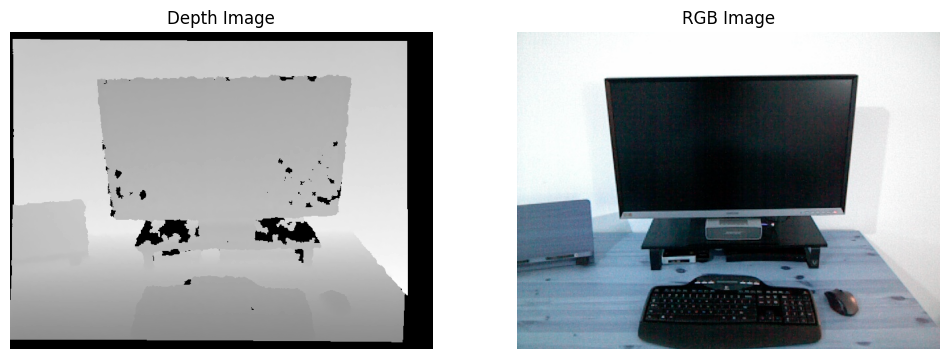

In [1]:
import numpy as np
import open3d as o3d
import cv2
import matplotlib.pyplot as plt

depth_image = cv2.imread('depth_img.png', cv2.IMREAD_UNCHANGED)
rgb_image = cv2.imread('rgb_img.jpg')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(depth_image, cmap='gray')
plt.title('Depth Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')

plt.show()

In [2]:
depth_image.shape

(480, 640)

In [3]:
rgb_image.shape

(480, 640, 3)

In [2]:
height, width = depth_image.shape
fx = 525.0  # x축 초점 거리
fy = 525.0  # y축 초점 거리
cx = width / 2  # x축 광학 중심
cy = height / 2  # y축 광학 중심

depth_o3d = o3d.geometry.Image(depth_image.astype(np.float32))
rgb_o3d = o3d.geometry.Image(rgb_image)

rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(rgb_o3d, depth_o3d,
                                                               depth_scale = 1000.0, depth_trunc = 1000.0)

pinhole_camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width, height, fx, fy, cx, cy)

point_cloud = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    pinhole_camera_intrinsic)

o3d.visualization.draw_geometries([point_cloud])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [4]:
points = np.asarray(point_cloud.points)

points.shape

(264619, 3)

In [7]:
random_indices = np.random.choice(points.shape[0], 10000, replace=False)
s_points = points[random_indices]

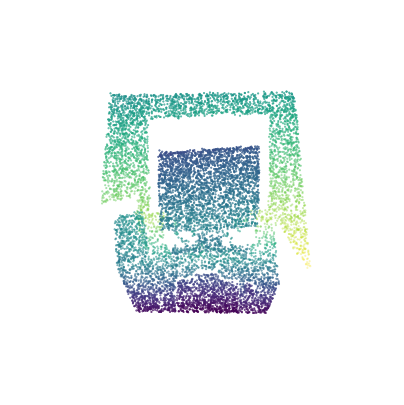

In [8]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(s_points[:, 0], s_points[:, 1], s_points[:, 2], c=s_points[:, 2], 
                cmap='viridis', marker='.', s=1)

ax.view_init(elev=-70, azim=270)
plt.axis('off')
plt.show()

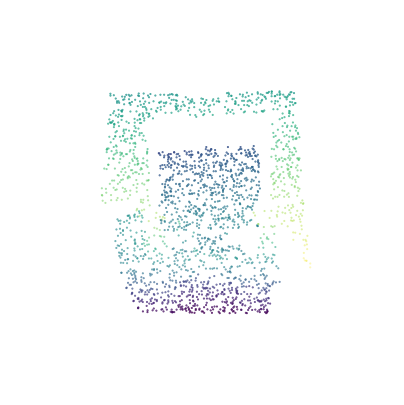

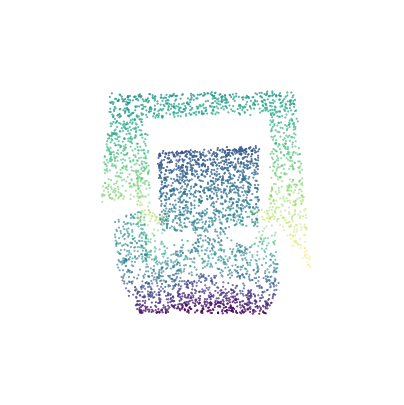

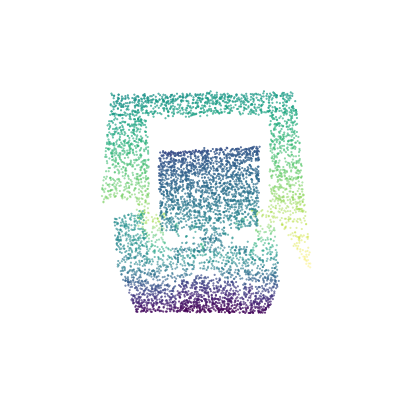

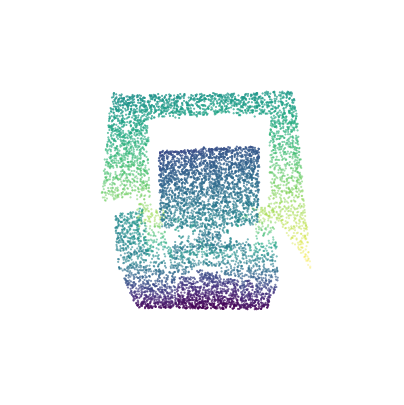

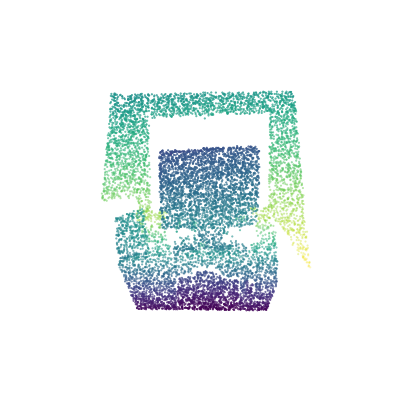

In [10]:

for i in range(1,6):
    random_indices = np.random.choice(points.shape[0], 2000*i, replace=False)
    s_points = points[random_indices]

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')

    sc = ax.scatter(s_points[:, 0], s_points[:, 1], s_points[:, 2], c=s_points[:, 2], 
                    cmap='viridis', marker='.', s=1)

    ax.view_init(elev=-70, azim=270)
    plt.axis('off')
    plt.show()

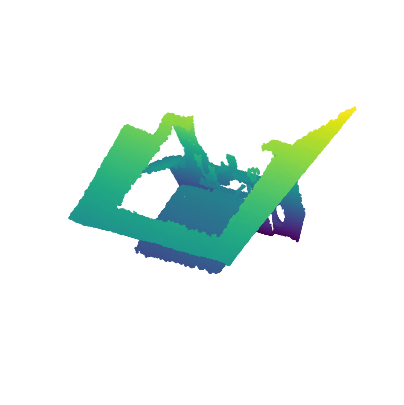

In [5]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap='viridis', marker='.', s=1)

plt.axis('off')
plt.show()

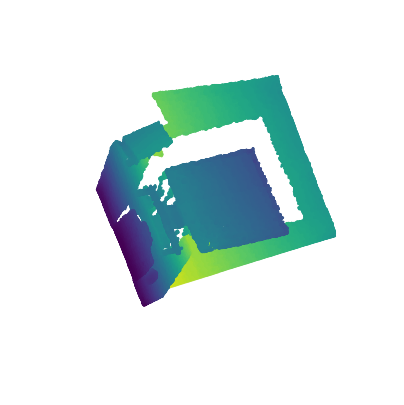

In [6]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)

ax.view_init(elev=-70, azim=200)
plt.axis('off')
plt.show()

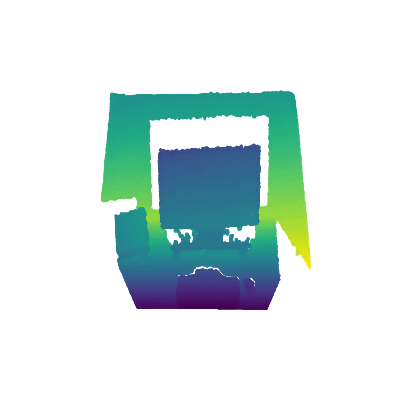

In [112]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)

ax.view_init(elev=-70, azim=270)
plt.axis('off')
plt.show()

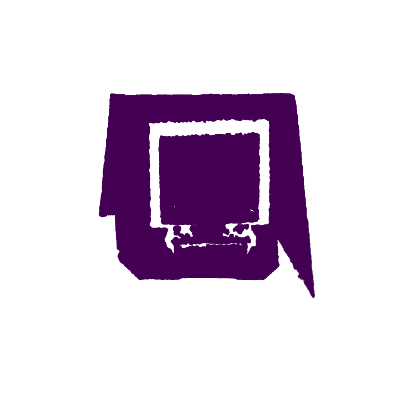

In [16]:
mask = (depth_image == 0) | np.isnan(depth_image)

inpaint_radius = 3 # Radius of circular neighborhood of each point
inpaint_flags = cv2.INPAINT_TELEA # You can also use cv2.INPAINT_NS
inpaint_depth_image = cv2.inpaint(depth_image.astype(np.float32), mask.astype(np.uint8), inpaint_radius, inpaint_flags)

for i in range(points.shape[0]):
    x, y, _ = points[i]
    points[i, 2] = inpaint_depth_image[int(y), int(x)]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)

ax.view_init(elev=-70, azim=270)
plt.axis('off')
plt.show()

In [12]:
points.shape

(264619, 3)

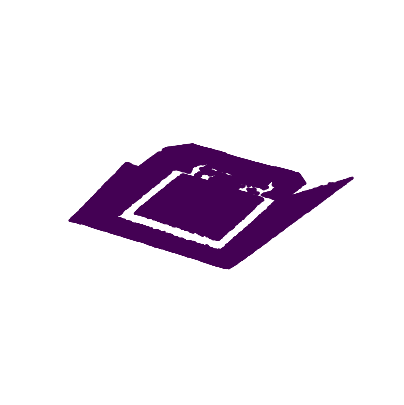

In [20]:
import cv2
import numpy as np

# Assuming 'depth_image' is your depth image with shape (height, width)
# and 'points' is your original points with shape (264619, 3)

# Create a mask where depth values are missing (e.g., 0 or NaN)
mask = (depth_image == 0) | np.isnan(depth_image)

# Use interpolation to fill in the missing values in the depth image
# You can choose the interpolation method, such as cv2.INTER_LINEAR or cv2.INTER_CUBIC
interpolation_method = cv2.INTER_LINEAR
inpaint_depth_image = cv2.resize(depth_image, (depth_image.shape[1], depth_image.shape[0]), interpolation=interpolation_method)

# Apply the modified depth values to the points
# Assuming 'x_coords' and 'y_coords' are the x and y coordinates of the points
for i in range(points.shape[0]):
    x, y, _ = points[i]
    points[i, 2] = inpaint_depth_image[int(y), int(x)]

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)

# ax.view_init(elev=-70, azim=270)
plt.axis('off')
plt.show()

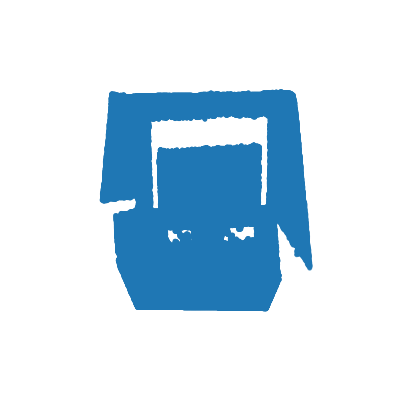

In [116]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker = '.')

ax.view_init(elev=-70, azim=270)
plt.axis('off')
plt.show()

In [ ]:

point_cloud_o3d = o3d.geometry.PointCloud()
point_cloud_o3d.points = o3d.utility.Vector3dVector(points)
print("completed points to 3d vector")

point_cloud_o3d.estimate_normals()

mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(
       point_cloud_o3d,
       o3d.utility.DoubleVector([0.5, 1]))
print("completed triangle mesh")

# Visualize the mesh
o3d.visualization.draw_geometries([mesh])
print("completed draw mesh")

In [ ]:
mesh.shape

In [ ]:
plt.figure(figsize=(12, 6))


for i in range(1,5):
    pcd = mesh.sample_points_uniformly(number_of_points = 1000*i)
    plt.subplot(1, 4, i)
    plt.imshow(pcd)
    plt.title("points: ", i)
    
plt.show()

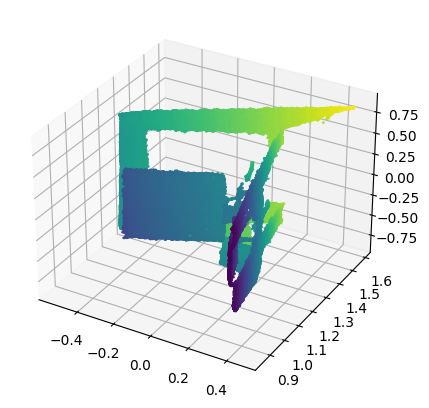

In [20]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 1], points[:, 2], points[:, 0], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)


plt.show()

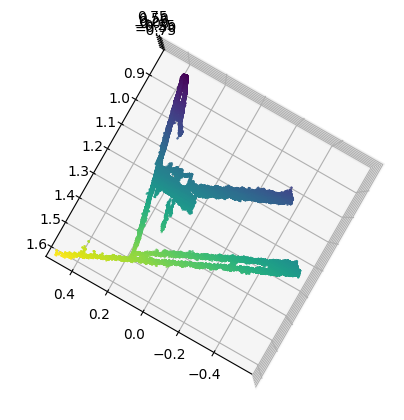

In [77]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(points[:, 1], points[:, 2], points[:, 0], c=points[:, 2], 
                cmap='viridis', marker='.', s=1)

ax.view_init(elev=-270, azim=120)
plt.show()